# Model Overview

| Algorithm             | Type            | Typical Use Cases                      | Advantages                                                                 | Disadvantages                                                             |
|-----------------------|------------------|----------------------------------------|----------------------------------------------------------------------------|---------------------------------------------------------------------------|
| Logistic Regression   | Classification   | Binary classification, churn prediction| Interpretable, fast, probabilistic output                                  | Assumes linearity, sensitive to outliers                                 |
| Decision Tree         | Classification/Regression | Customer segmentation, credit scoring | Easy to interpret, handles non-linear relationships                        | Prone to overfitting                                                      |
| Random Forest         | Classification/Regression | Feature-rich datasets, general classification | Handles missing values, reduces overfitting via ensemble                  | Slower to predict, less interpretable                                     |
| Gradient Boosting     | Classification/Regression | Ranking problems, Kaggle competitions  | High accuracy, handles non-linearity                                       | Prone to overfitting, longer training times                              |
| K-Nearest Neighbors   | Classification/Regression | Recommendation systems, anomaly detection | Simple, no training phase                                                  | Slow prediction, sensitive to noise and scale                            |
| Support Vector Machine| Classification/Regression | Text classification, image recognition | Works well with high-dimensional data, robust margin-based optimization     | Computationally expensive, hard to tune                                   |
| Naive Bayes           | Classification   | Text classification, spam detection     | Fast, works well with high-dimensional data                                | Assumes feature independence                                              |
| Linear Regression     | Regression       | Price prediction, sales forecasting     | Simple, interpretable                                                      | Assumes linearity, sensitive to outliers                                 |
| Lasso/Ridge Regression| Regression       | Feature selection, collinearity handling| Prevents overfitting, handles multicollinearity                           | Assumes linearity                                                         |
| XGBoost / LightGBM    | Classification/Regression | High-performance modeling, tabular data| Very fast, regularization included                                         | Harder to interpret, requires tuning                                      |
| K-Means Clustering    | Unsupervised     | Customer segmentation, image compression| Simple, scalable                                                           | Assumes spherical clusters, sensitive to initialization                   |
| DBSCAN                | Unsupervised     | Density-based clustering, anomaly detection| Detects arbitrary shapes, no need to specify k                            | Struggles with varying densities and high dimensions                      |
| PCA (Principal Component Analysis) | Unsupervised | Dimensionality reduction, visualization | Reduces overfitting, speeds up computation                                | Hard to interpret components                                               |

# General Terminology

## Objective function (a.k.a. loss/cost function)
The objective function is the goal of learning. The objective function is the mathematical expression that defines what a model is trying to optimize during training.

* It quantifies *how good or bad a model’s predictions are* compared to the true outcomes.
* The training algorithm adjusts the model parameters (weights) to *minimize (or maximize)* this function.

**Context in machine learning**
**In supervised learning:**
* Regression → minimize **Mean Squared Error (MSE)**.
* Classification → minimize **Cross-Entropy Loss (log loss)**.
* In SVMs: minimize a function that balances **maximizing margin and penalizing misclassifications**.
  
**In unsupervised learning:**
* K-Means → **minimize distance between points and their cluster centers**.

**In reinforcement learning:**
* **maximize the expected cumulative reward**.

> The objective function is the “scorecard” the algorithm tries to optimize — it tells the model what “good performance” means in the given context.

## Logistic function
The logistic function (also called the **sigmoid function**, because of its s-shape) is a mathematical function often used in classification models like logistic regression. The logistic (sigmoid) function is:

$\sigma(z) = \frac{1}{1 + e^{-z}}$ - where $z$ is the input (often a linear combination of features, like $w^T x + b)$.

**Key properties**
* Maps any real number $z \in (-\infty, \infty)$ to a value between 0 and 1.
* Output can be interpreted as a probability.
* Symmetrical around 0.
* At $z = 0$, $\sigma(0) = 0.5$.

In logistic regression, we model: $P(y=1 \mid x) = \sigma(w^T x + b)$
* → This means we predict the probability of class 1 given input x.
* It turns a linear function (which could be any real number) into something between 0 and 1, making it interpretable as probability.

Shape intuition
* For large negative input → output ≈ 0
* For large positive input → output ≈ 1
* For values near 0 → output ≈ 0.5 (uncertain prediction)


> The logistic/sigmoid function squashes any number into the range (0,1), making it ideal for turning linear model outputs into probabilities in classification tasks.

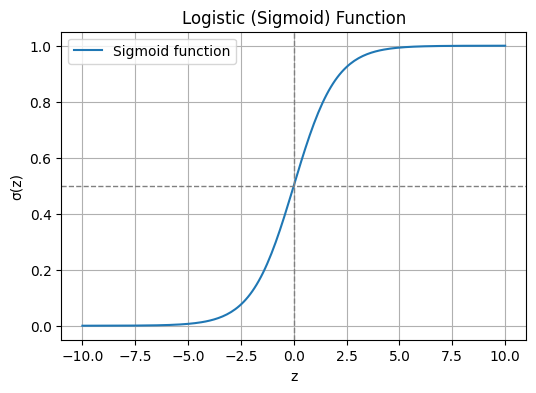

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate input values
z = np.linspace(-10, 10, 200)
sig_values = sigmoid(z)

# Plot sigmoid curve
plt.figure(figsize=(6,4))
plt.plot(z, sig_values, label="Sigmoid function")
plt.axhline(0.5, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Logistic (Sigmoid) Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.grid(True)
plt.show()

* On the far left, values approach $0$.
* On the far right, values approach $1$.
* At $z = 0$, the sigmoid outputs exactly $0.5$.

## Loss function
The term "loss" is used as a general term for *error penalty*. A loss function determines how much penalty should be assigned to an instance based on the error in the model's predictive value. So the loss is the **penalty (the difference) for being wrong**.

* Small loss = good prediction
* Big loss = bad prediction.

The model’s job **during training** is simple: *Keep adjusting until the loss is as small as possible.*

### Three Important Loss Functions
1. **Mean Squared Error (MSE)** – used in regression
Measures how far predictions are from reality, penalizing large mistakes more heavily.

2. **Log Loss (Cross-Entropy Loss)** – used in classification
Looks at probability predictions, not just the label.

3. **Hinge Loss** – used in Support Vector Machines
Focuses on ensuring predictions are not only correct but also confidently on the right side of the boundary.


Other Loss Functions (just mentioned briefly)
* **Zero-One Loss** → counts how many predictions are simply right vs wrong.
* **Huber Loss** → like MSE but less sensitive to outliers.
* **MAE (Mean Absolute Error)** → punishes errors linearly, not quadratically like MSE.

> A loss function is the model’s “scorecard.” By minimizing it, we train models to make predictions that are not just accurate, but accurate in the way that matters most for the business problem.

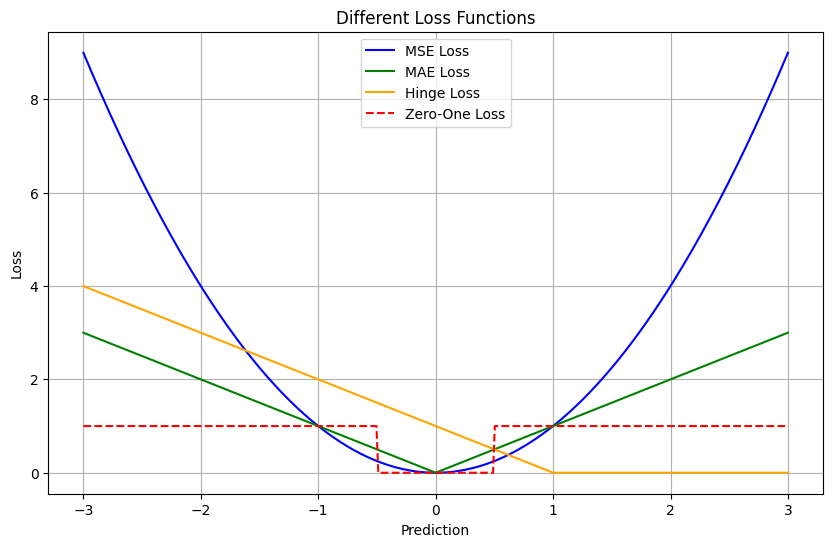

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Predictions around the true value (y_true = 0 for simplicity)
y_true = 0
preds = np.linspace(-3, 3, 400)

# Different loss functions
mse_loss = (preds - y_true)**2
mae_loss = np.abs(preds - y_true)
hinge_loss = np.maximum(0, 1 - preds)  # true label assumed +1
zero_one_loss = (preds.round() != y_true).astype(int)  # rough example

plt.figure(figsize=(10,6))

plt.plot(preds, mse_loss, label="MSE Loss", color="blue")
plt.plot(preds, mae_loss, label="MAE Loss", color="green")
plt.plot(preds, hinge_loss, label="Hinge Loss", color="orange")
plt.plot(preds, zero_one_loss, label="Zero-One Loss", color="red", linestyle="--")

plt.title("Different Loss Functions")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Overfitting Avoidance: Model Complexity and Regularization

## Definition: Overfitting
Overfitting happens when a model learns the training data too well, including its random noise or quirks, instead of learning the general patterns. I.e. the model looks great on the data it already saw, but performs poorly on new customers because it doesn’t generalize.

* All models can be overfit
* The best strategy is to recognize overfitting by testing with a holdout set.
* A *fitting graph* has to curves showing model performance on training and testing data as a function of model complexity (you can plot error or accuracy)
* A *learning curve* shows model performance on testing data plotted plotted against the amount of training data used.
* *Cross-validation* specifies a systematic way of splitting up a single data set that generates multiple performance measures. It tells what average behavior the model yields as well as the variation to expect.
* *Regularization* is trying to avoid overfit (e.g. through tree pruning, feature selection or applying explicit complexity penalties)

### Fitting Graph

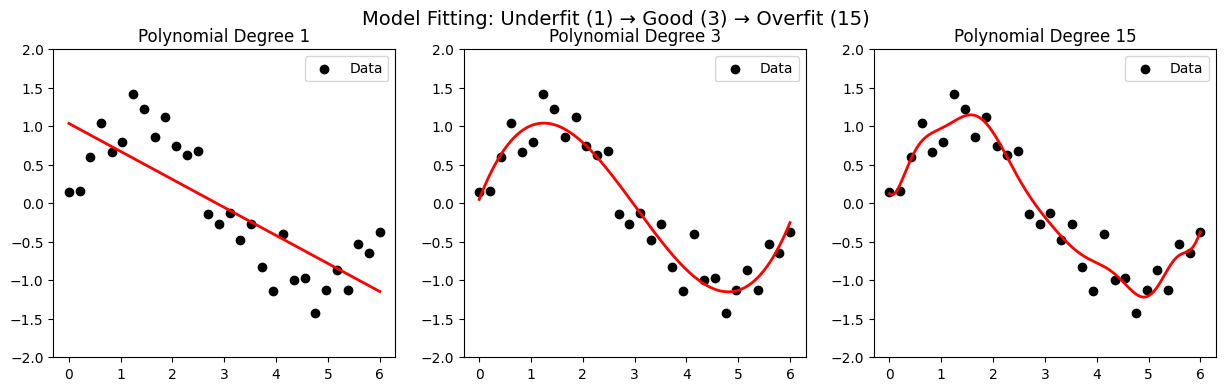

In [1]:
# Re-imports after reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data (noisy sine wave)
np.random.seed(42)
X = np.linspace(0, 6, 30)
y = np.sin(X) + np.random.normal(0, 0.3, size=len(X))

X_reshaped = X.reshape(-1,1)

# Degrees of polynomial to test
degrees = [1, 3, 15]

plt.figure(figsize=(15,4))

for i, deg in enumerate(degrees, 1):
    # Create polynomial features
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X_reshaped)
    
    # Fit model
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    # Plot
    plt.subplot(1,3,i)
    plt.scatter(X, y, color="black", label="Data")
    
    # Smooth curve for plotting
    X_plot = np.linspace(0, 6, 200).reshape(-1,1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    plt.plot(X_plot, y_plot, color="red", linewidth=2)
    plt.title(f"Polynomial Degree {deg}")
    plt.ylim(-2, 2)
    plt.legend()

plt.suptitle("Model Fitting: Underfit (1) → Good (3) → Overfit (15)", fontsize=14)
plt.show()

* **Left (Degree 1, underfit)**: Model is too simple → misses the curve (high bias).
* **Middle (Degree 3, good fit)**: Captures the main pattern without chasing noise.
* **Right (Degree 15, overfit)**: Model wiggles through every data point, memorizing noise (high variance).

### Model Learning Curve
* Plots training error and validation error as we increase the size of the training set.
* Tells us if more data will help, or if the model is too simple/too complex.

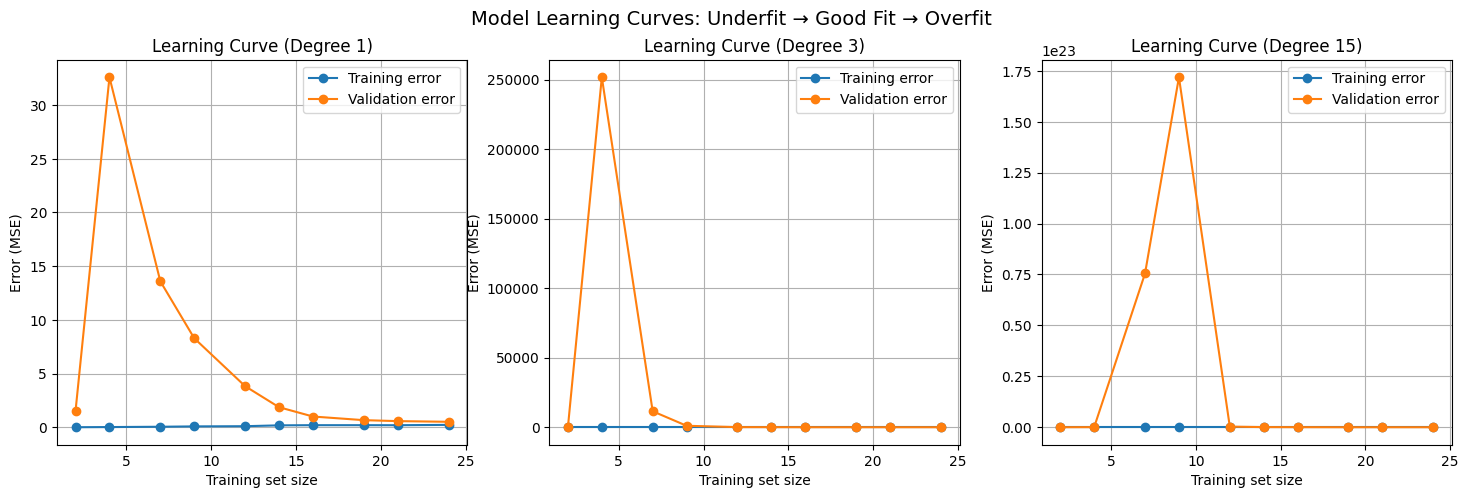

In [2]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

# Use a polynomial regression model with controlled degree
def plot_learning_curve(degree, X, y, ax):
    # Pipeline: polynomial features + linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X.reshape(-1,1), y, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring="neg_mean_squared_error"
    )
    
    train_errors = -train_scores.mean(axis=1)
    val_errors = -val_scores.mean(axis=1)
    
    ax.plot(train_sizes, train_errors, "o-", label="Training error")
    ax.plot(train_sizes, val_errors, "o-", label="Validation error")
    ax.set_title(f"Learning Curve (Degree {degree})")
    ax.set_xlabel("Training set size")
    ax.set_ylabel("Error (MSE)")
    ax.legend()
    ax.grid(True)

# Plot for underfit (deg=1), good fit (deg=3), overfit (deg=15)
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, deg in enumerate([1, 3, 15]):
    plot_learning_curve(deg, X, y, axes[i])

plt.suptitle("Model Learning Curves: Underfit → Good Fit → Overfit", fontsize=14)
plt.show()

* **Degree 1 (underfit)**: Both errors high and flat → model too simple, more data doesn’t help.
* **Degree 3 (good fit)**: Validation error decreases with more data, training error low → healthy.
* **Degree 15 (overfit)**: Training error very low (almost flat at 0), validation error much higher → classic overfitting.

**Note: Why training error looks almost flat here**
* We used polynomial regression with LinearRegression (least squares).
* Linear regression fits exactly the same way regardless of sample size (unless the data is tiny).
* So as we increase training set size, the average training error doesn’t change much — hence the flat lines.

> So — it’s expected that training error looks flat here, because linear regression doesn’t change much with more samples. It still illustrates the key lesson: **the gap between training and validation errors tells the story**.

The next example shows learning curves with a decision tree showing a more dramatic "textbook pattern":

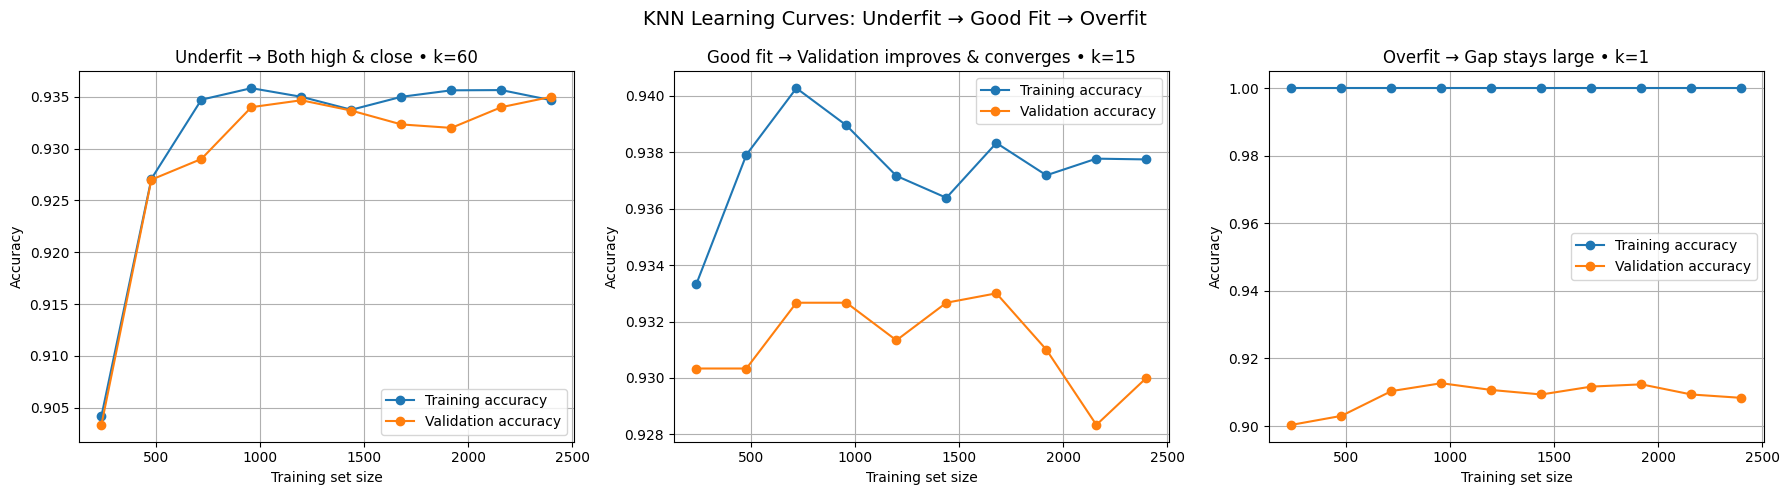

In [7]:
# Side-by-side learning curves for KNN: underfit, good fit, overfit

fig, axes = plt.subplots(1, 3, figsize=(18,5))

configs = [(60, "Underfit → Both high & close • k=60"),
           (15, "Good fit → Validation improves & converges • k=15"),
           (1,  "Overfit → Gap stays large • k=1")]

for ax, (k, title) in zip(axes, configs):
    clf = KNeighborsClassifier(n_neighbors=k)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=clf,
        X=X,
        y=y,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring="accuracy",
        shuffle=True,
        random_state=42
    )
    train_acc = train_scores.mean(axis=1)
    val_acc = val_scores.mean(axis=1)

    ax.plot(train_sizes, train_acc, "o-", label="Training accuracy")
    ax.plot(train_sizes, val_acc, "o-", label="Validation accuracy")
    ax.set_title(title)
    ax.set_xlabel("Training set size")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(True)

plt.suptitle("KNN Learning Curves: Underfit → Good Fit → Overfit", fontsize=14)
plt.tight_layout()
plt.show()

**What we expect in theory:**
* Underfit: both training & validation accuracy should be lower than in the good fit case, and close together.
* Good fit: training accuracy high, validation accuracy slightly lower but converging.
* Overfit: training accuracy very high, validation accuracy noticeably lower with a persistent gap.

**What we saw in the KNN runs:**
* Underfit (k=60): training ≈ 0.934, validation ≈ 0.934
* Good fit (k=15): training ≈ 0.938, validation ≈ 0.930

These are very close in absolute values. That can feel disappointing, because we expect a bigger gap.
**But it’s not “wrong” — it reflects:**
1.	The dataset is not very hard. Even a too-smooth classifier (k=60) does pretty well.
2.	The metric (accuracy) hides subtleties. A smoother boundary may still classify most points correctly, so accuracy looks decent.
3.	The differences are small numerically (93.4% vs 93.8%), but the pattern of curves is what matters:
	* Underfit: both flat, high-bias plateau.
	* Good fit: training high, validation improves with more data.
	* Overfit: training ~1.0, validation significantly lower.

### Base Rate and its role
> The base rate is simply the **prevalence** (Häufigkeit) of a certain outcome in your population **before you apply any model**.
> So the base rate is the overall probability of the event (e.g. predicting churn) in your population.

* Example: If historically, 20% of customers churn, then your base rate for churn is 20%.
* A dumb model that always predicts “no churn” will already be 80% accurate — simply by reflecting the base rate.

This is why high training accuracy can be misleading — we must compare against the base rate and check generalization.

**Example 1: Customer Churn**
* Suppose you have 10,000 customers.
* 1,000 of them churned last year.
* So the base rate of churn is:

$Base rate= \frac{1,000}{10,000}=10\%$

**Why it matters**
- Helps you understand the minimum performance baseline your model must beat.
- Crucial in class imbalance problems (fraud, churn, rare diseases).
- Misunderstanding base rates leads to the base rate fallacy: ignoring how rare an event is when interpreting results.

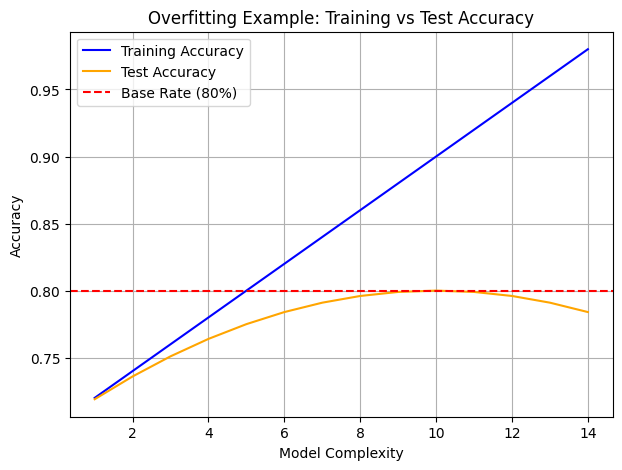

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example: training vs test accuracy as model complexity grows
complexity = np.arange(1, 15)
train_acc = 0.7 + 0.02*complexity           # goes up steadily
test_acc = 0.7 + 0.02*complexity - 0.001*(complexity**2)  # goes up, then drops

plt.figure(figsize=(7,5))
plt.plot(complexity, train_acc, label="Training Accuracy", color="blue")
plt.plot(complexity, test_acc, label="Test Accuracy", color="orange")
plt.axhline(0.8, color="red", linestyle="--", label="Base Rate (80%)")

plt.title("Overfitting Example: Training vs Test Accuracy")
plt.xlabel("Model Complexity")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Model complexity vs. generalization**
* Simple models (like linear regression) are easy to interpret and less prone to overfitting, but may underfit if relationships are highly non-linear.
* Complex models (like deep trees, ensembles, neural nets) can capture subtle patterns but risk overfitting noise in the data.

**Bias–variance tradeoff**
* High bias = model too simple, misses real structure.
* High variance = model too flexible, fits noise instead of signal.

**Control mechanisms**
* **Linear models**: keep the number of predictors limited, use feature selection or regularization (e.g., Lasso, Ridge).
* **Non-linear models**: prune trees, restrict depth, use regularization parameters, cross-validation.

## Practical Wisdom for Balance
1. **Start simple, add complexity only if justified**
A well-tuned linear or logistic regression often performs surprisingly well. Move to non-linear models when evidence shows simple ones underfit.

2. **Use cross-validation rigorously**
It’s your compass for detecting overfitting. If test performance diverges from training performance, tighten control.

3. **Regularization is your safety net**
* **For linear models**: L1/L2 penalties shrink coefficients, reducing variance.
* **For non-linear models**: parameters like tree depth, learning rate, or dropout prevent runaway complexity.

4. **Feature engineering > blind complexity**
Often, improving features (domain knowledge, transformations) yields more than switching to a “bigger” model.

5. Prefer interpretability when stakes are high
In business settings, clarity often matters more than squeezing out the last 1% of accuracy.

> If a simpler model with proper cross-validation performs close to a complex model, choose the simpler one.

### 📊 Linear Models (Regression, Logistic Regression)

| Method | How it Helps |
|--------|--------------|
| **Feature Selection** | Removes irrelevant predictors, reduces variance. |
| **Regularization (Ridge/Lasso/ElasticNet)** | Balances fit + simplicity by shrinking coefficients. |
| **Cross-Validation** | Guides choice of regularization strength (λ). |

### 🌳 Non-Linear Models (Trees, Ensembles, Neural Nets)

| Method | How it Helps |
|--------|--------------|
| **Early Stopping** | Stop training before overfitting noise. |
| **Tree Depth / Min Samples per Leaf** | Restricts tree size, prevents overly specific splits. |
| **Pruning** | Cuts back branches that don't generalize. |
| **Regularization (Dropout, Weight Decay)** | Adds constraints to reduce variance. |
| **Learning Rate (Boosting)** | Controls model updates; lower = more stable generalization. |


# Model Evaluation: What is a good model?

## Model Evaluation Overview

| **Task** | **What you want to evaluate** | **Common Evaluation Methods** | **Notes / When to Use** |
|----------|-------------------------------|-------------------------------|--------------------------|
| **Classification** (predict class labels) | How well does the model assign the correct class? | - Accuracy<br>- Precision, Recall, F1<br>- Confusion Matrix<br>- Balanced Accuracy (for imbalance) | - Accuracy only if classes are balanced.<br>- Use Precision/Recall/F1 when false positives/negatives have different costs.<br>- Macro vs. Micro averaging important for multi-class. |
| **Instance Scoring** (rank by likelihood of being positive) | How well does the model rank instances (positives higher than negatives)? | - ROC AUC<br>- PR AUC (Precision-Recall AUC)<br>- Gini coefficient | - ROC AUC = good overall separability.<br>- PR AUC better for highly imbalanced datasets.<br>- Often reported together with classification metrics. |
| **Class Probability Estimation** (calibrated probabilities) | How accurate are predicted probabilities compared to true likelihoods? | - Log Loss (Cross-Entropy)<br>- Brier Score<br>- Calibration Plots (Reliability Diagrams)<br>- Expected Calibration Error (ECE) | - Use Log Loss when you care about penalizing overconfident wrong predictions.<br>- Use Brier Score for probability accuracy.<br>- Calibration curves show if probabilities need recalibration. |
| **Ranking / Recommendation** (top-N predictions) | How well does the model order items for relevance? | - Precision@K, Recall@K<br>- MAP (Mean Average Precision)<br>- NDCG (Normalized Discounted Cumulative Gain) | - Common in recommender systems and search.<br>- Focus on how well the **top-ranked** items matter to the user. |
| **Regression** (predict continuous values) | How close are predictions to true values? | - RMSE, MAE, MAPE<br>- R² (Coefficient of Determination)<br>- Residual Analysis | - RMSE = penalizes large errors.<br>- MAE = more robust to outliers.<br>- MAPE = interpretable as % error but breaks on near-0 values. |
| **Survival / Time-to-Event** | How well does the model predict event timing? | - Concordance Index (C-Index)<br>- Calibration curves<br>- Brier Score for survival | - Used in churn, medical survival, etc.<br>- Evaluates ranking of risks over time. |
| **Causal / Uplift Modeling** | How well does the model estimate treatment effects? | - Qini curve<br>- Uplift Curve<br>- AUUC (Area Under Uplift Curve) | - Needed in A/B testing and personalized marketing.<br>- Evaluates if we target the right users. |
| **Clustering** (unsupervised grouping) | How meaningful are the discovered clusters? | - Silhouette Score<br>- Davies–Bouldin Index<br>- Calinski–Harabasz Index<br>- Adjusted Rand Index (if ground truth known) | - Use internal metrics (silhouette, DB, CH) without ground truth.<br>- Use external metrics (ARI, NMI) if labels exist. |
| **Anomaly / Outlier Detection** | How well does the model detect rare events? | - Precision, Recall (on anomaly class)<br>- ROC AUC / PR AUC<br>- Detection Rate vs False Alarm Rate | - Highly imbalanced → PR AUC often more meaningful.<br>- Domain-specific costs (false alarm vs missed anomaly) are critical. |
| **NLP / Text Models** | Quality of generated or classified text | - BLEU, ROUGE (for generation)<br>- Perplexity (for language models)<br>- Accuracy/F1 (for classification) | - BLEU/ROUGE common in translation & summarization.<br>- Perplexity for evaluating LM probability quality.<br>- Human eval often needed. |
| **Computer Vision** | Quality of object detection / segmentation | - IoU (Intersection over Union)<br>- mAP (mean Average Precision)<br>- Dice Score | - IoU & Dice for segmentation.<br>- mAP for object detection tasks. |

## Confusion Matrix
|                       | **Predicted Spam** | **Predicted Not Spam** |
|-----------------------|---------------------|-------------------------|
| **Actually Spam**     | <span style="color:green">40 (True Positive)</span>  | <span style="color:red">10 (False Negative)</span>|
| **Actually Not Spam** | <span style="color:red">5 (False Positive)</span> | <span style="color:green">45 (True Negative)</span>|

### Metrics overview

| **Metric** | **Formula** | **What it means** |
|------------|-------------|--------------------|
| **Accuracy** | $\dfrac{TP + TN}{TP + TN + FP + FN}$ | → Overall correctness of the model (fraction of all predictions that are right). |
| **Precision (Positive Predictive Value, PPV)** | $\dfrac{TP}{TP + FP}$ | → Of all predicted positives, how many are truly positive? |
| **Recall (Sensitivity, True Positive Rate)** | $\dfrac{TP}{TP + FN}$ | → Of all actual positives, how many did we correctly catch? |
| **Specificity (True Negative Rate)** | $\dfrac{TN}{TN + FP}$ | → Of all actual negatives, how many did we correctly identify as negative? |
| **F1 Score** | $2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ | → Penalizes imbalance: both precision and recall need to be high for F1 to be high (If either precision or recall is 0, F1 = 0) |

## ROC Curve

> Plots **True Positive Rate (TPR) vs False Positive Rate (FPR)** as you vary the classification threshold.

- **ROC = Receiver Operating Characteristic curve.**
- It’s a diagnostic plot for binary classifiers.
- Shows the trade-off between catching positives vs raising false alarms.
- Area under ROC (AUC) gives a single-number summary:
    - AUC = 0.5 → random guessing
    - AUC = 1.0 → perfect classifier
    - AUC > 0.7 → often “useful” in practice
  
**Example: Business Example (Launch Prediction):**
* Say we want to classify a launch as Success (1) vs Failure (0).
* True Positive = correctly predicting a success
* False Positive = predicting success but it fails (ouch!)
* We might want to tune the threshold depending on risk appetite.

> * ROC/AUC evaluates the model’s ability to separate classes, independent of payoff assumptions.
> * Expected Value evaluates the business decision payoff, using model probabilities + costs/benefits.

⚠️ 

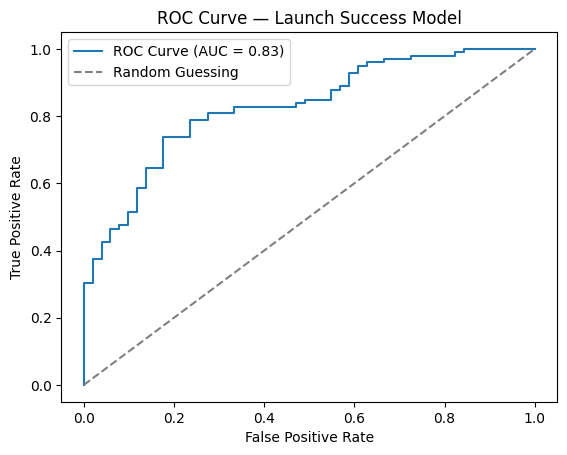

AUC = 0.83
- AUC close to 1.0 means the model separates successes from failures well.
- If AUC ≈ 0.5, the model is no better than random.
- The curve helps decide thresholds: e.g., prioritize fewer false alarms or more true positives.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# -----------------------------
# Step 1: Simulate binary data (success vs failure)
# -----------------------------
np.random.seed(42)
n = 500
marketing_spend = np.random.normal(100, 20, n)
complexity = np.random.randint(1, 5, n)
team_size = np.random.randint(3, 20, n)

# True probability of success
true_prob = 1 / (1 + np.exp(-(0.05*marketing_spend - 0.8*complexity + 0.1*team_size - 3)))
y = np.random.binomial(1, true_prob)

X = pd.DataFrame({
    'marketing_spend': marketing_spend,
    'complexity': complexity,
    'team_size': team_size
})

# -----------------------------
# Step 2: Train/Test split + model
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities on test set
probs = model.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Compute ROC curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# -----------------------------
# Step 4: Plot ROC curve
# -----------------------------
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1],[0,1], linestyle='--', color='grey', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Launch Success Model")
plt.legend()
plt.show()

# -----------------------------
# Step 5: Interpretation
# -----------------------------
print(f"AUC = {auc:.2f}")
print("- AUC close to 1.0 means the model separates successes from failures well.")
print("- If AUC ≈ 0.5, the model is no better than random.")
print("- The curve helps decide thresholds: e.g., prioritize fewer false alarms or more true positives.")


## Cumulative Response Curve & Lift Curve

### Cumulative Response Curve
> **Definition**: Plots the cumulative % of actual positives captured vs the % of population targeted, when customers are ranked by model score.

Instead of looking at true positives vs false positives (ROC), **cumulative response curve** looks at business value: how many actual successes you capture if you act on the top scorers.

“If I target the top X% of customers ranked by model score, what % of actual positives will I capture?”

or

“If I only have budget to market to 30% of customers, what fraction of buyers will I capture?”

**How it works**
* Rank customers by predicted probability (from high to low).
* Divide into deciles (or percentiles).
* Plot the cumulative % of actual positives captured vs cumulative % of population targeted.
  * A perfect model: captures 100% of positives early (steep curve).
  * A random model: diagonal line (e.g., targeting 20% of customers → 20% of positives).
  

**Example**
* You send a promotion to customers.
* Model predicts probability each customer will buy.
* You can only target 40% of the population (budget constraint).
* Question: “How many of the actual buyers can I capture if I focus on the top 40%?”

### Lift Curve
> **Definition**: Compares the model’s performance to random targeting by plotting the lift (improvement factor).

It highlights how much better the model is than random, at different targeting levels.

Formula (for a given cutoff):
$\text{Lift at k\%} = \frac{\text{Response Rate in Top k\%}}{\text{Overall Response Rate}}$


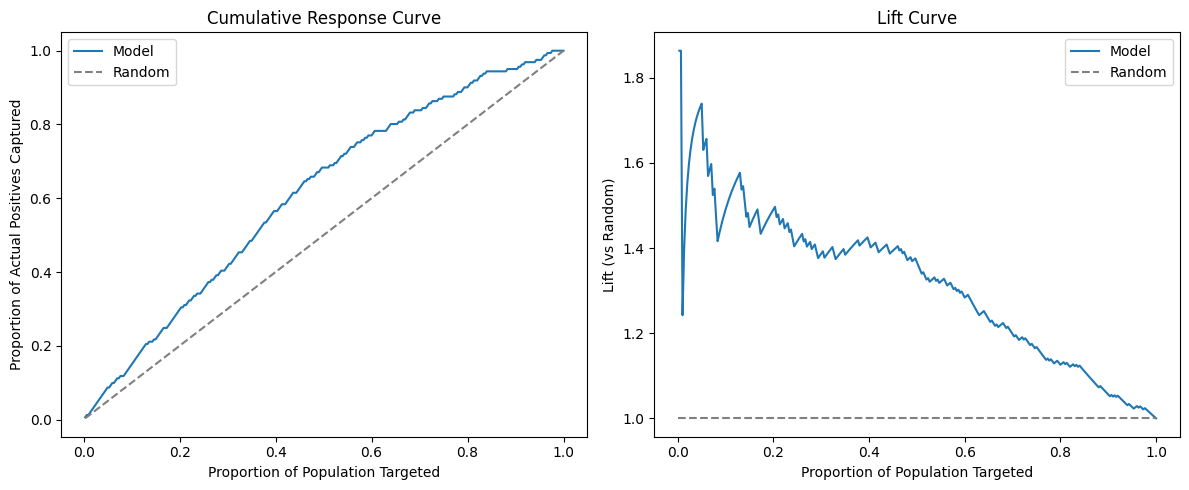

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# -----------------------------
# Step 1: Simulate binary data (success vs failure)
# -----------------------------
np.random.seed(42)
n = 1000
X = np.random.normal(0, 1, (n, 3))
true_probs = 1 / (1 + np.exp(-(0.8*X[:,0] - 0.5*X[:,1] + 0.3*X[:,2])))
y = np.random.binomial(1, true_probs)

# -----------------------------
# Step 2: Train/Test split + model
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Sort by predicted score
# -----------------------------
sorted_idx = np.argsort(-probs)
y_sorted = y_test[sorted_idx]

# Cumulative positives captured
cum_positives = np.cumsum(y_sorted)
total_positives = sum(y_test)
cum_response = cum_positives / total_positives

# Population percentages
pop_pct = np.arange(1, len(y_test)+1) / len(y_test)

# -----------------------------
# Step 4: Compute Lift
# -----------------------------
overall_rate = total_positives / len(y_test)
response_rate_topk = cum_positives / np.arange(1, len(y_test)+1)
lift = response_rate_topk / overall_rate

# -----------------------------
# Step 5: Plot Response Curve and Lift Curve side by side
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# (a) Cumulative Response Curve
axs[0].plot(pop_pct, cum_response, label="Model")
axs[0].plot(pop_pct, pop_pct, linestyle="--", color="gray", label="Random")
axs[0].set_title("Cumulative Response Curve")
axs[0].set_xlabel("Proportion of Population Targeted")
axs[0].set_ylabel("Proportion of Actual Positives Captured")
axs[0].legend()

# (b) Lift Curve
axs[1].plot(pop_pct, lift, label="Model")
axs[1].hlines(1, 0, 1, colors="gray", linestyles="--", label="Random")
axs[1].set_title("Lift Curve")
axs[1].set_xlabel("Proportion of Population Targeted")
axs[1].set_ylabel("Lift (vs Random)")
axs[1].legend()

plt.tight_layout()
plt.show()
